In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
X = pd.read_csv('D:\VS\Coding-Blocks-ML\Linear Regression\Linear_X_Train.csv')
y = pd.read_csv('D:\VS\Coding-Blocks-ML\Linear Regression\Linear_Y_Train.csv')
print(X.head(),'\n', y.head())
#convert X, y into numpy arrays and normalize
X = X.values
y = y.values

u = X.mean
print(u)
s = X.std()
print(s)

          x
0 -0.289307
1 -0.588810
2  1.027507
3 -0.259013
4  0.782043 
            y
0  -0.091101
1 -53.467721
2  75.457009
3 -12.025286
4  57.414187
<built-in method mean of numpy.ndarray object at 0x0000018608973F80>
0.9920801322508517


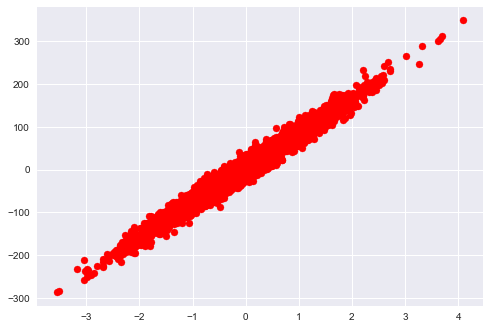

(3750, 1)


In [16]:
plt.style.use('seaborn')
plt.scatter(X, y, color='red')
plt.show()
print(X.shape)

### Linear Regression

In [52]:
def hypothesis(x, theta):
    # theta = [theta0, theta1]

    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2, ))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        grad[0] +=(y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2

    return total_error/m

def gradientDesent(X, Y, max_steps = 100, learning_rate = 0.1):
    theta = np.zeros((2, ))
    error_list = []
    theta_list = []
    for i in range(max_steps):

        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]

        theta_list.append((theta[0], theta[1]))

    return theta, error_list, theta_list



In [53]:
theta, error_list, theta_list = gradientDesent(X, y)
print(theta, '\n', error_list)

[ 3.72687896 80.54086647] 
 [array([6576.35005246]), array([5382.10116306]), array([4411.49946152]), array([3622.60756627]), array([2981.36244807]), array([2460.09492819]), array([2036.32790862]), array([1691.80078718]), array([1411.67742971]), array([1183.90311642]), array([998.68240386]), array([848.05513558]), array([725.55212733]), array([625.91553452]), array([544.87173451]), array([478.94684832]), array([425.31688589]), array([381.68600791]), array([346.18762175]), array([317.30402305]), array([293.8011006]), array([274.67527734]), array([259.1103913]), array([246.44265199]), array([236.13215782]), array([227.7397446]), array([220.90816592]), array([215.34679392]), array([210.819181]), array([207.13294679]), array([204.13155518]), array([201.6876277]), array([199.69750573]), array([198.07682823]), array([196.75693483]), array([195.6819403]), array([194.80635471]), array([194.09314753]), array([193.51217265]), array([193.03888696]), array([192.65330781]), array([192.33916462]), ar

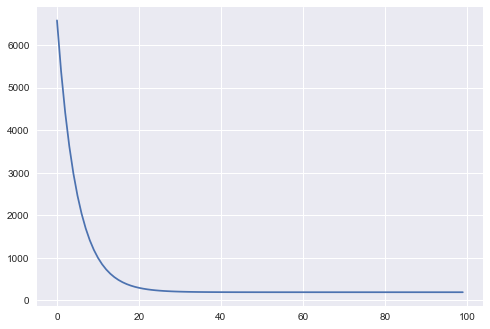

In [24]:
plt.plot(error_list)

### Predictions and Best Line

In [25]:
y_ = hypothesis(X, theta)
print(y_)

[[-19.57419108]
 [-43.69635897]
 [ 86.48322254]
 ...
 [-20.85126634]
 [138.69991375]
 [-35.87967507]]


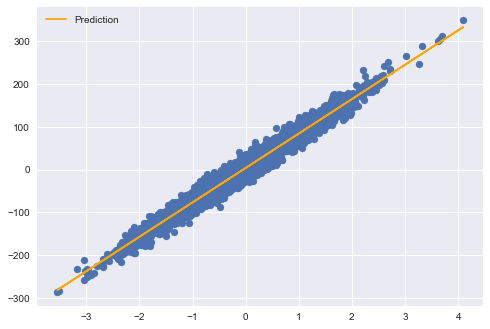

In [26]:
plt.scatter(X, y)
plt.plot(X, y_, color='orange', label='Prediction')
plt.legend()
plt.show()

In [41]:
#loading test data
X_test = pd.read_csv('D:\VS\Coding-Blocks-ML\Linear Regression\Linear_X_Test.csv').values
y_test = hypothesis(X_test, theta)

y_test.shape

(1250, 1)

In [43]:
df = pd.DataFrame(data = y_test, columns=["y"])
df.to_csv("y_predictions.csv", index= False)

### Computing Score

In [44]:
def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)

    score = (1 - num/denom)
    return score*100

In [45]:
r2_score(y, y_)

97.09612220841039

### Surface Plots

In [46]:
from mpl_toolkits.mplot3d import Axes3D

In [47]:
theta

array([ 3.72687896, 80.54086647])

In [48]:
T0 = np.arange(-40, 40, 1)
T1 = np.arange(40, 120, 1)
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i, j]*X + T0[i, j]
        J[i, j] = np.sum((y-y_)**2)/y.shape[0]

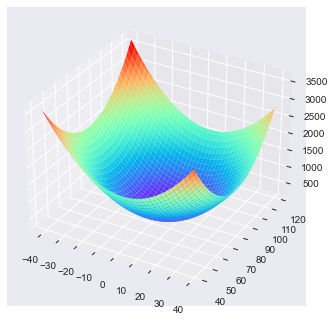

In [49]:
fig = plt.figure()
axes = fig.gca(projection= '3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

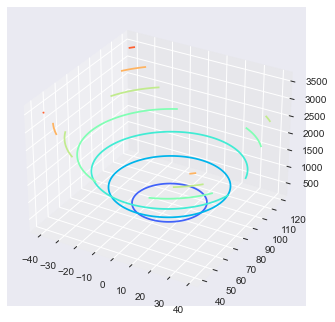

In [50]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()

Plot the change in values of theta

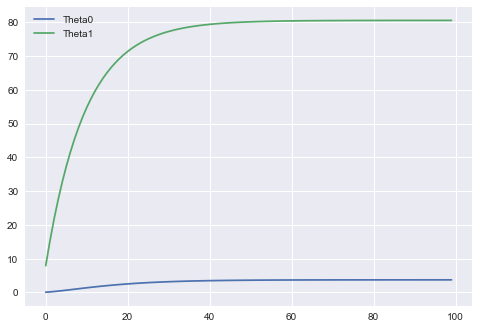

In [54]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:, 0], label='Theta0')
plt.plot(theta_list[:, 1], label="Theta1")
plt.legend()
plt.show()

Trajectory traced by Theta Updates in the Loss Function

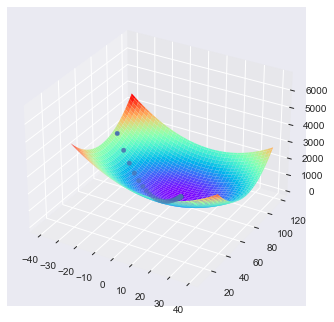

In [55]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

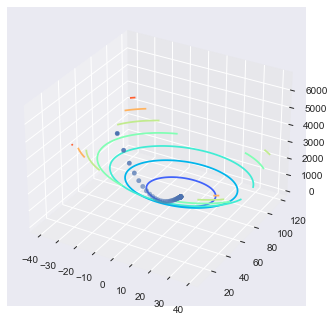

In [56]:

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

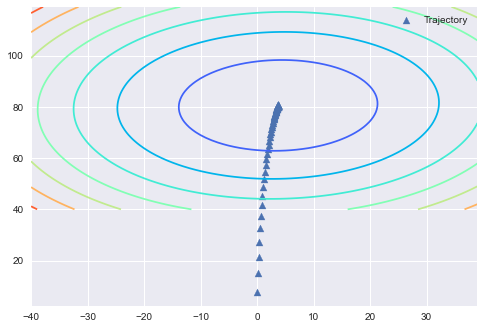

In [57]:

# 2D Contour Plot 
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label='Trajectory')
plt.legend()
plt.show()

In [58]:

# Save the data in file

theta_list
np.save("ThetaList.npy",theta_list)